In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("../resources/cardio_train.csv",sep=";")
df["age"]=(df["age"]/365).round() # возраст в годах с округлением до целого
df["height"]=df["height"]/100 # рост в метрах 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  float64
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 6.9 MB


In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,1.68,76.0,120,80,1,1,1,0,1,0
69996,99995,62.0,1,1.58,126.0,140,90,2,2,0,0,1,1
69997,99996,52.0,2,1.83,105.0,180,90,3,1,0,1,0,1
69998,99998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1


1. Определите количество мужчин и женщин среди испытуемых. Обратите внимание, что способ кодирования переменной gender мы не знаем. Воспользуемся медицинским фактом, а именно: мужчины в среднем выше женщин.

In [4]:
people=df["gender"].value_counts()
people

1    45530
2    24470
Name: gender, dtype: int64

In [5]:
df.pivot_table(values=["height"],index=["gender"],aggfunc="mean")

,height
gender,
1,1.613556
2,1.699479


1Ж > 2М

Верно ли, что мужчины более склонны к употреблению алкоголя, чем женщины?

In [6]:
df["alco"].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

In [7]:
pd.crosstab(df["gender"],df["alco"])

alco,0,1
gender,,
1,44369,1161
2,21867,2603


2М"alco">1Ж"alco"
при этом женщин опрошено в 2 раза больше

2. Каково различие между процентами курящих мужчин и женщин?

In [8]:
pd.crosstab(df["gender"],df["smoke"])

smoke,0,1
gender,,
1,44717,813
2,19114,5356


In [9]:
df_smoke=df[df["smoke"]==1].copy() # df с курящими 

In [10]:
df_smoke_w=df_smoke.drop(df_smoke[(df_smoke["gender"]==2)].index) # df с курящими Ж

In [11]:
df_smoke_m=df_smoke.drop(df_smoke[(df_smoke["gender"]==1)].index) # df с курящими М

In [12]:
df_smoke["gender"].value_counts(normalize=True) # процентное соотношение

2    0.868212
1    0.131788
Name: gender, dtype: float64

Какова разница между средними значениями возраста для курящих и некурящих?

In [13]:
df.groupby("smoke")["age"].mean()

smoke
0    53.439395
1    52.296645
Name: age, dtype: float64

Создайте новый признак --- BMI (body mass index, индекс массы тела). Для этого разделите вес в килограммах на квадрат роста в метрах. Считается, что нормальные значения ИМТ составляют от 18.5 до 25.

In [14]:
# df["BMI"]=df["weight"]/(df["height"])

In [18]:
df["BMI"]=df["weight"]/(df["height"].pow(2))

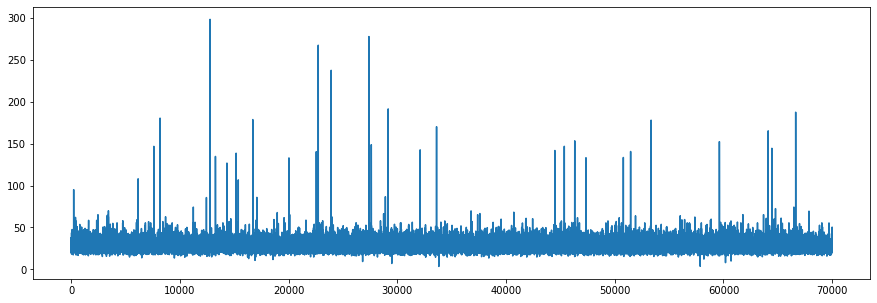

In [43]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(df["BMI"]);

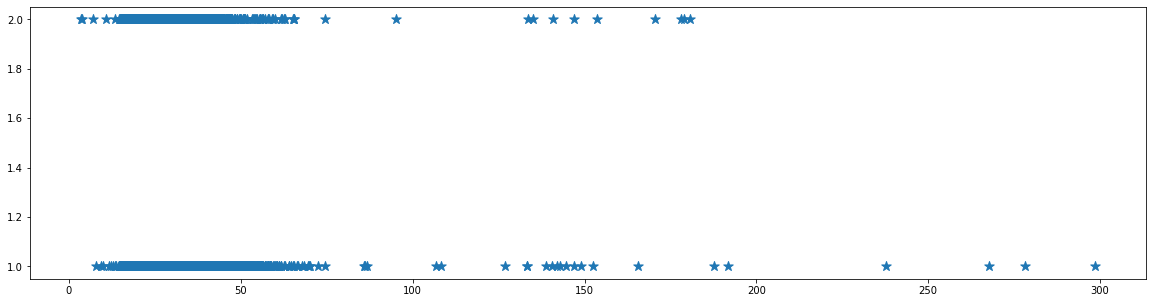

In [57]:
fig, ax = plt.subplots(figsize=(20, 5))
plt.scatter(df["BMI"],df["gender"], marker="*", s=100)

 Выберите верные утверждения:

(a) Средний ИМТ находится в диапазоне нормальных значений ИМТ.

(b) ИМТ для женщин в среднем выше, чем для мужчин.

(c) У здоровых людей в среднем более высокий ИМТ, чем у людей с ССЗ.

(d) Для здоровых непьющих мужчин ИМТ ближе к норме, чем для здоровых непьющих женщин

In [32]:
df["BMI"].mean() # средний ИМТ выше нормального

27.55651255127886

In [42]:
df.groupby("gender")["BMI"].mean() # ИМТ для женщин в среднем выше, чем для мужчин

gender
1    27.987583
2    26.754442
Name: BMI, dtype: float64

In [58]:
df.groupby("cardio")["BMI"].mean() # У здоровых людей в среднем более низкий ИМТ, чем у людей с ССЗ

cardio
0    26.548175
1    28.566061
Name: BMI, dtype: float64

In [64]:
df.groupby("gender"&"cardio"&"alco")["BMI"].mean()

TypeError: unsupported operand type(s) for &: 'str' and 'str'